In [1]:
import pandas as pd
import numpy as np

# Read and clean the data, Because the data is announced by the official, we do not consider the outliers.
regular = pd.read_csv('2021-2022 NBA Player Stats - Regular.csv',delimiter=";", encoding="latin-1", index_col=0)


In [67]:
advanced = pd.read_excel('2021-2022advanced.xlsx',index_col=0)
advanced['TS%'].fillna(advanced['TS%'].mean(),inplace=True)
advanced['3PAr'].fillna(advanced['3PAr'].mean(),inplace=True)
advanced['FTr'].fillna(advanced['FTr'].mean(),inplace=True)
advanced['TOV%'].fillna(advanced['TOV%'].mean(),inplace=True)

In [161]:
word = ''
separate_search_name = 'a b c dfdf sadsa'.split()
for i in separate_search_name:
    word = word + i.capitalize()
word

'ABCDfdfSadsa'

In [72]:
play_by_play = pd.read_excel("2021-2022play-by-play.xlsx",index_col=0,header=1)
play_by_play


,Player,Pos,Age,Tm,G,MP,PG%,SG%,SF%,PF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot.1,Off..1,PGA,And1,Blkd
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,73,1725,NaN,NaN,NaN,0.02,...,0.0,19,26,70,24,64,10,200,15,51
2,Steven Adams,C,28,MEM,76,1999,NaN,NaN,NaN,NaN,...,4.2,71,15,78,19,83,13,569,23,44
3,Bam Adebayo,C,24,MIA,56,1825,NaN,NaN,NaN,0.02,...,5.5,59,39,72,38,173,8,480,48,40
4,Santi Aldama,PF,21,MEM,32,360,NaN,NaN,0.03,0.49,...,-3.8,7,3,16,5,16,1,58,5,5
5,LaMarcus Aldridge,C,36,BRK,47,1050,NaN,NaN,NaN,NaN,...,0.1,12,11,46,12,56,0,110,22,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Thaddeus Young,PF,33,TOR,26,475,NaN,0.18,0.59,0.22,...,4.4,14,7,27,1,16,7,107,5,11
602,Trae Young,PG,23,ATL,76,2652,1.0,NaN,NaN,NaN,...,3.4,221,54,47,9,151,28,1709,32,93
603,Omer Yurtseven,C,23,MIA,56,706,NaN,NaN,NaN,NaN,...,0.3,13,11,52,12,31,4,121,9,18


In [3]:
pd.Series(["2021-2022", '2020-2021', '2019-2020'])

0    2021-2022
1    2020-2021
2    2019-2020
dtype: object

In [149]:
import numpy as np
letter_vector = [0]*26
searched_name = 'Precious'
for letter in searched_name.lower():
    if ord(letter)<=96 or ord(letter)>= 123:
        continue
    position = ord(letter) - 96
    if letter_vector[position-1] == 0:
        letter_vector[position-1] = 1
total_letter_vector = []
for i in data['Player']:
    vector = [0]*26
    i = i.lower()
    for j in i:
        if ord(j) <= 96 or ord(j) >= 123:
            continue
        position = ord(j) - 96
        if vector[position-1] == 0:
            vector[position-1] = 1
    total_letter_vector.append(vector)
min = 100
index = 0
position = 0
for i in total_letter_vector:
    distance = np.linalg.norm(np.array(i) - np.array(letter_vector))
    if distance < min:
        min = distance
        position = index
    index += 1
data['Player'].iloc[position]


'Precious Achiuwa'

In [152]:
def findsimilar(data,searched_name):
    letter_vector = [0]*26
    for letter in searched_name.lower():
        if ord(letter)<=96 or ord(letter)>= 123:
            continue
        position = ord(letter) - 96
        if letter_vector[position-1] == 0:
            letter_vector[position-1] = 1
    total_letter_vector = []
    for i in data['Player']:
        vector = [0]*26
        i = i.lower()
        for j in i:
            if ord(j) <= 96 or ord(j) >= 123:
                continue
            position = ord(j) - 96
            if vector[position-1] == 0:
                vector[position-1] = 1
        total_letter_vector.append(vector)
    min = 100
    index = 0
    position = 0
    for i in total_letter_vector:
        distance = np.linalg.norm(np.array(i) - np.array(letter_vector))
        if distance < min:
            min = distance
            position = index
        index += 1
    return data['Player'].iloc[position]

In [154]:
findsimilar(data,'aa')

'Mo Bamba'

<AxesSubplot: title={'center': 'TRB of Precious Achiuwa'}>

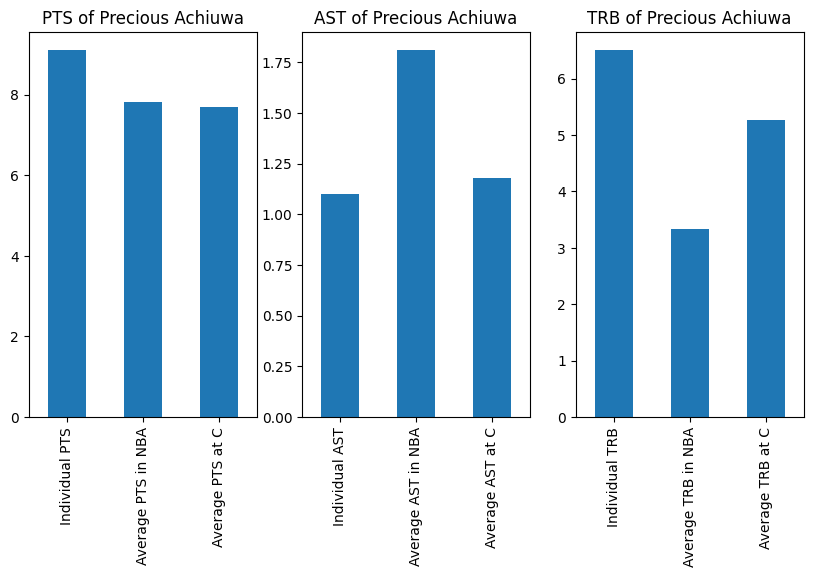

In [205]:
import matplotlib.pyplot as plt
searched_name = 'Precious Achiuwa'
regular = regular.reset_index(drop=True)
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].set_title(f'PTS of {searched_name}')
ax[1].set_title(f'AST of {searched_name}')
ax[2].set_title(f'TRB of {searched_name}')
PTS = regular[regular.Player == searched_name]['PTS'].mean()
AST = regular[regular.Player == searched_name]['AST'].mean()
TRB = regular[regular.Player == searched_name]['TRB'].mean()
PTS_total_average = regular.PTS.mean()
PTS_position_average = regular[regular['Pos'] == regular[regular.Player == searched_name]['Pos'].squeeze()]['PTS'].mean()  #find the average pts of the same position
AST_total_average = regular.AST.mean()
AST_position_average =  regular[regular['Pos'] == regular[regular.Player == searched_name]['Pos'].squeeze()]['AST'].mean()
TRB_total_average = regular.TRB.mean()
TRB_position_average = regular[regular['Pos'] == regular[regular.Player == searched_name]['Pos'].squeeze()]['TRB'].mean()
PTS_pd = pd.Series([PTS,PTS_total_average,PTS_position_average],['Individual PTS','Average PTS in NBA','Average PTS at '+str( regular[regular.Player == searched_name]['Pos'].squeeze())])
PTS_pd.plot.bar(ax=ax[0])
AST_pd = pd.Series([AST,AST_total_average,AST_position_average],['Individual AST','Average AST in NBA','Average AST at '+str( regular[regular.Player == searched_name]['Pos'].squeeze())])
AST_pd.plot.bar(ax=ax[1])
TRB_pd = pd.Series([TRB,TRB_total_average,TRB_position_average],['Individual TRB','Average TRB in NBA','Average TRB at '+str( regular[regular.Player == searched_name]['Pos'].squeeze())])
TRB_pd.plot.bar(ax=ax[2])

In [171]:
regular[regular.Player == searched_name]['Pos'] == 'C'

Rk
1    True
Name: Pos, dtype: bool

In [191]:
PTS_position_average = regular[regular['Pos'] == regular[regular.Player == searched_name]['Pos'].squeeze()]['PTS'].mean()

In [189]:
a=regular[regular.Player == searched_name]['Pos']

In [196]:
AST_pd 

Individual AST        0    1.1
Name: AST, dtype: float64
Average AST in NBA                              1.808251
Average AST at C                                1.179231
dtype: object

In [194]:
regular[regular.Player == searched_name]['Pos'].squeeze()

'C'

<AxesSubplot: >

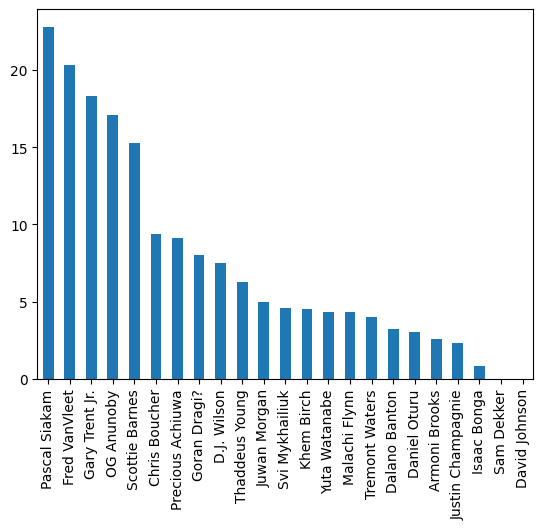

In [270]:
team = 'TOR'
pd.Series(list(regular[regular['Tm'] == team]['PTS']),index=list(regular[regular['Tm'] == team]['Player'])).sort_values(ascending=False).plot.bar()

In [10]:
regular['Tm'].unique()

array(['TOR', 'MEM', 'MIA', 'BRK', 'TOT', 'NOP', 'UTA', 'MIL', 'CLE',
       'IND', 'LAL', 'ORL', 'NYK', 'HOU', 'WAS', 'PHO', 'SAC', 'DET',
       'CHO', 'CHI', 'ATL', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN',
       'DAL', 'GSW', 'POR', 'BOS'], dtype=object)

In [13]:
unique_team = regular['Tm'].unique()
unique_team = np.delete(unique_team,np.where(unique_team == 'TOT'))
unique_team

array(['TOR', 'MEM', 'MIA', 'BRK', 'NOP', 'UTA', 'MIL', 'CLE', 'IND',
       'LAL', 'ORL', 'NYK', 'HOU', 'WAS', 'PHO', 'SAC', 'DET', 'CHO',
       'CHI', 'ATL', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN', 'DAL',
       'GSW', 'POR', 'BOS'], dtype=object)